<a href="https://colab.research.google.com/github/Arnav613Gupta/machine_learning/blob/main/Precision_Recall_F1_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introduction**

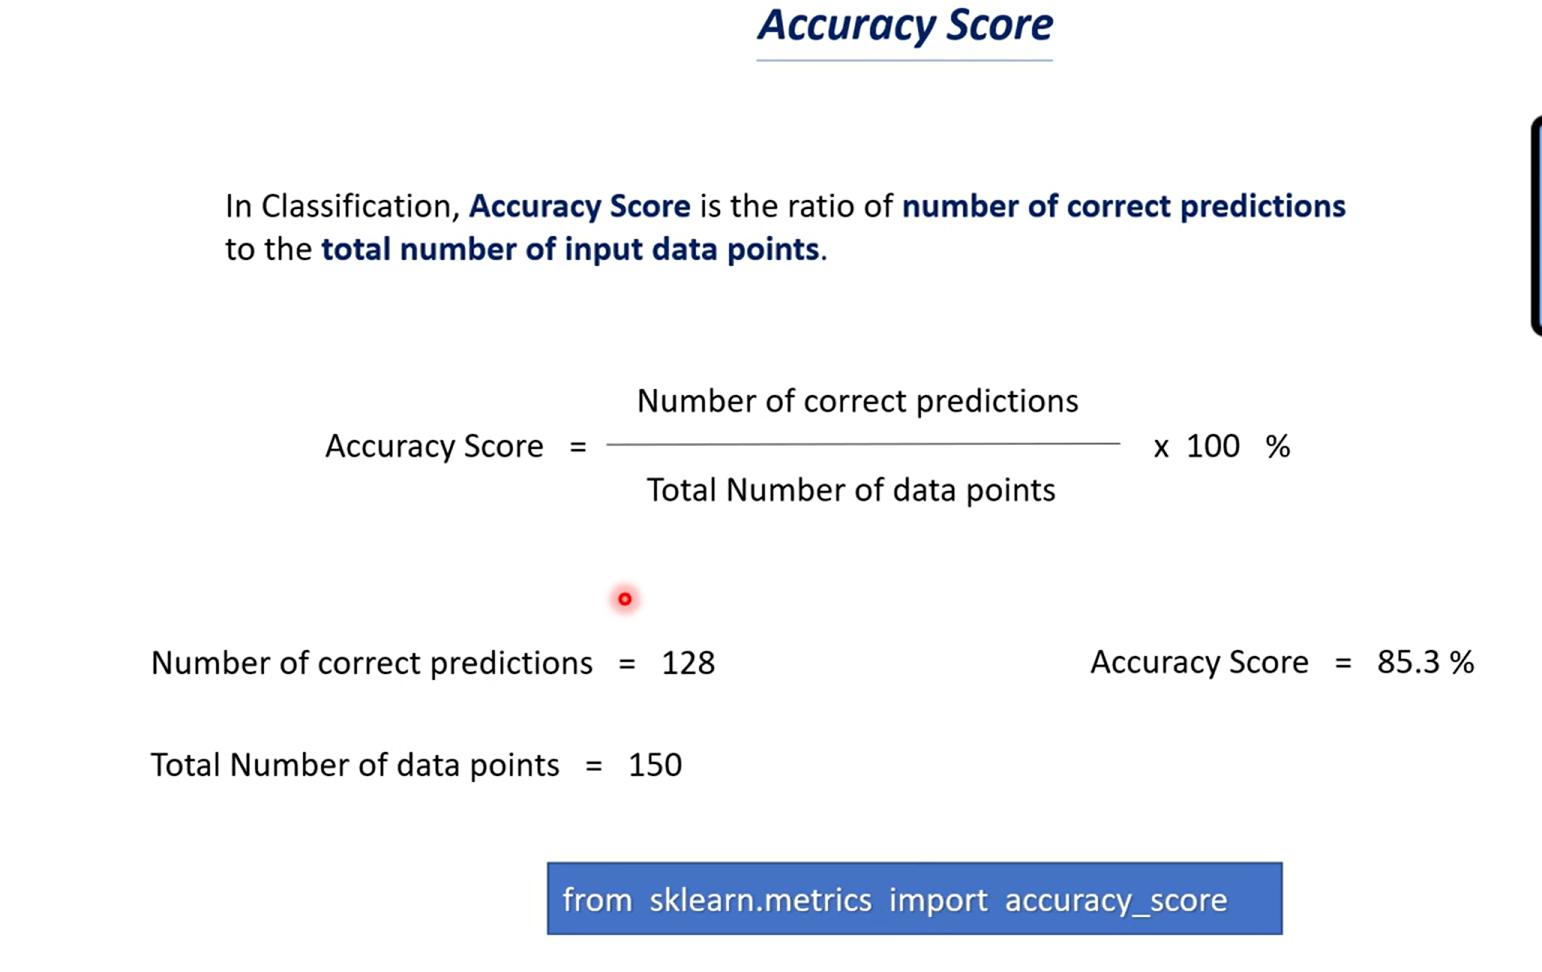

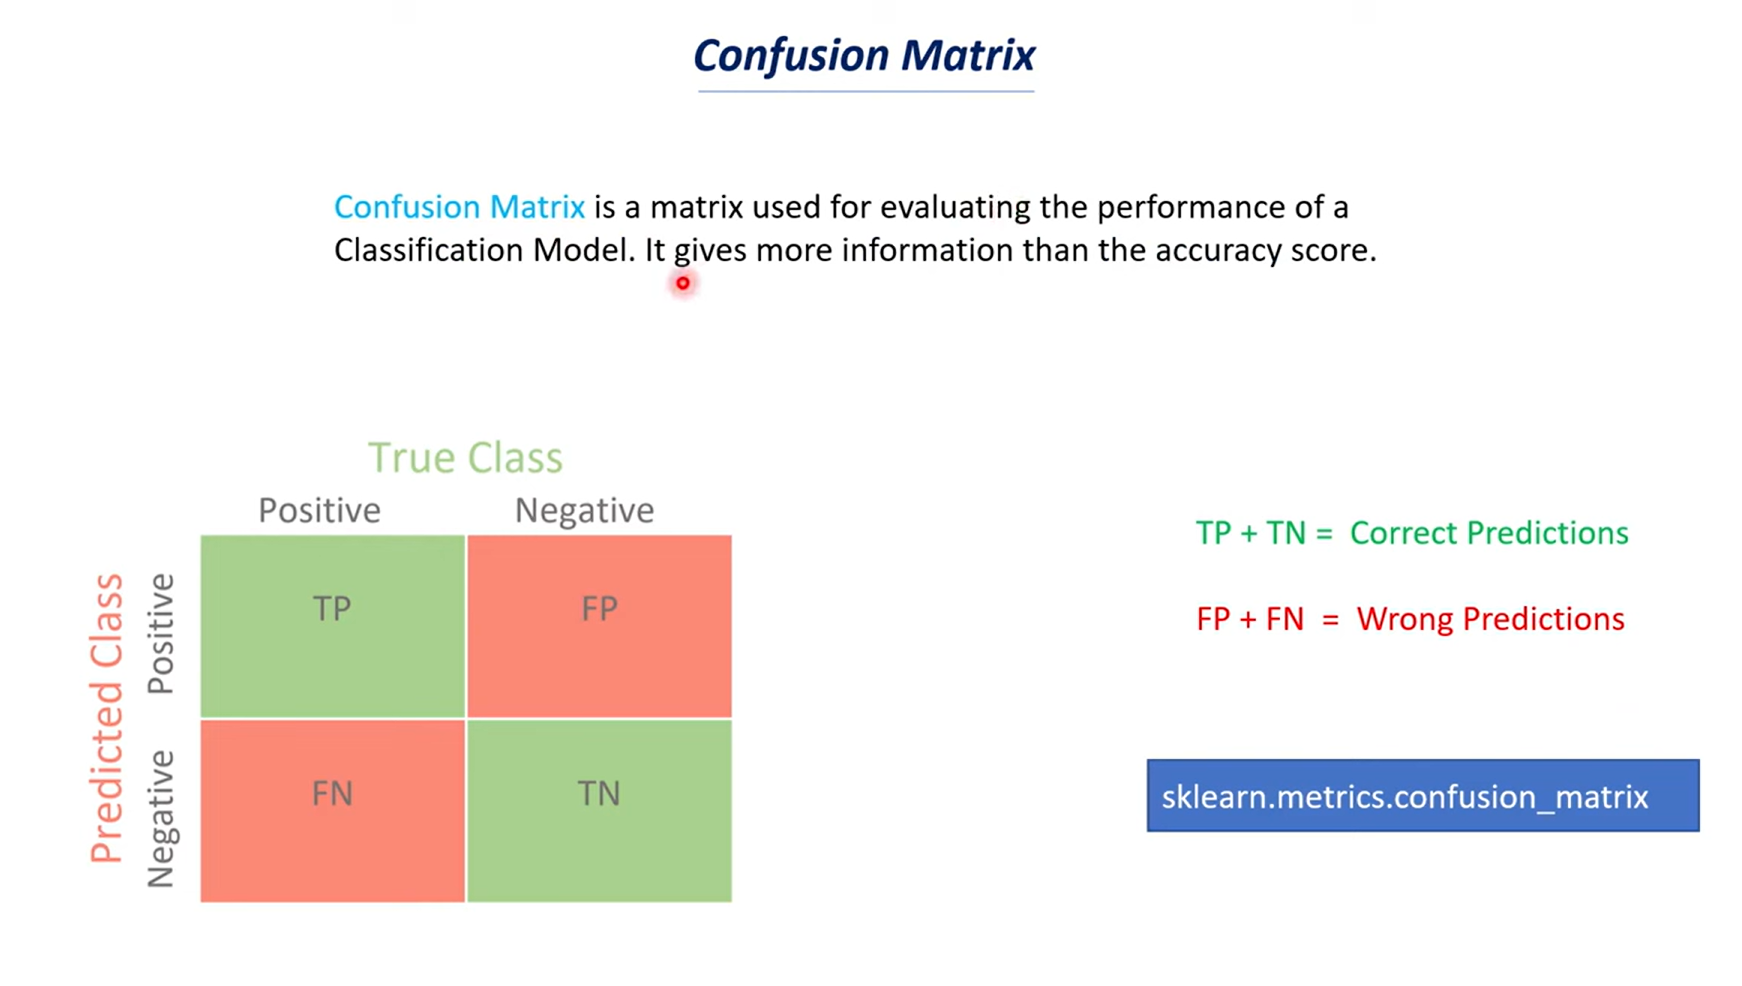

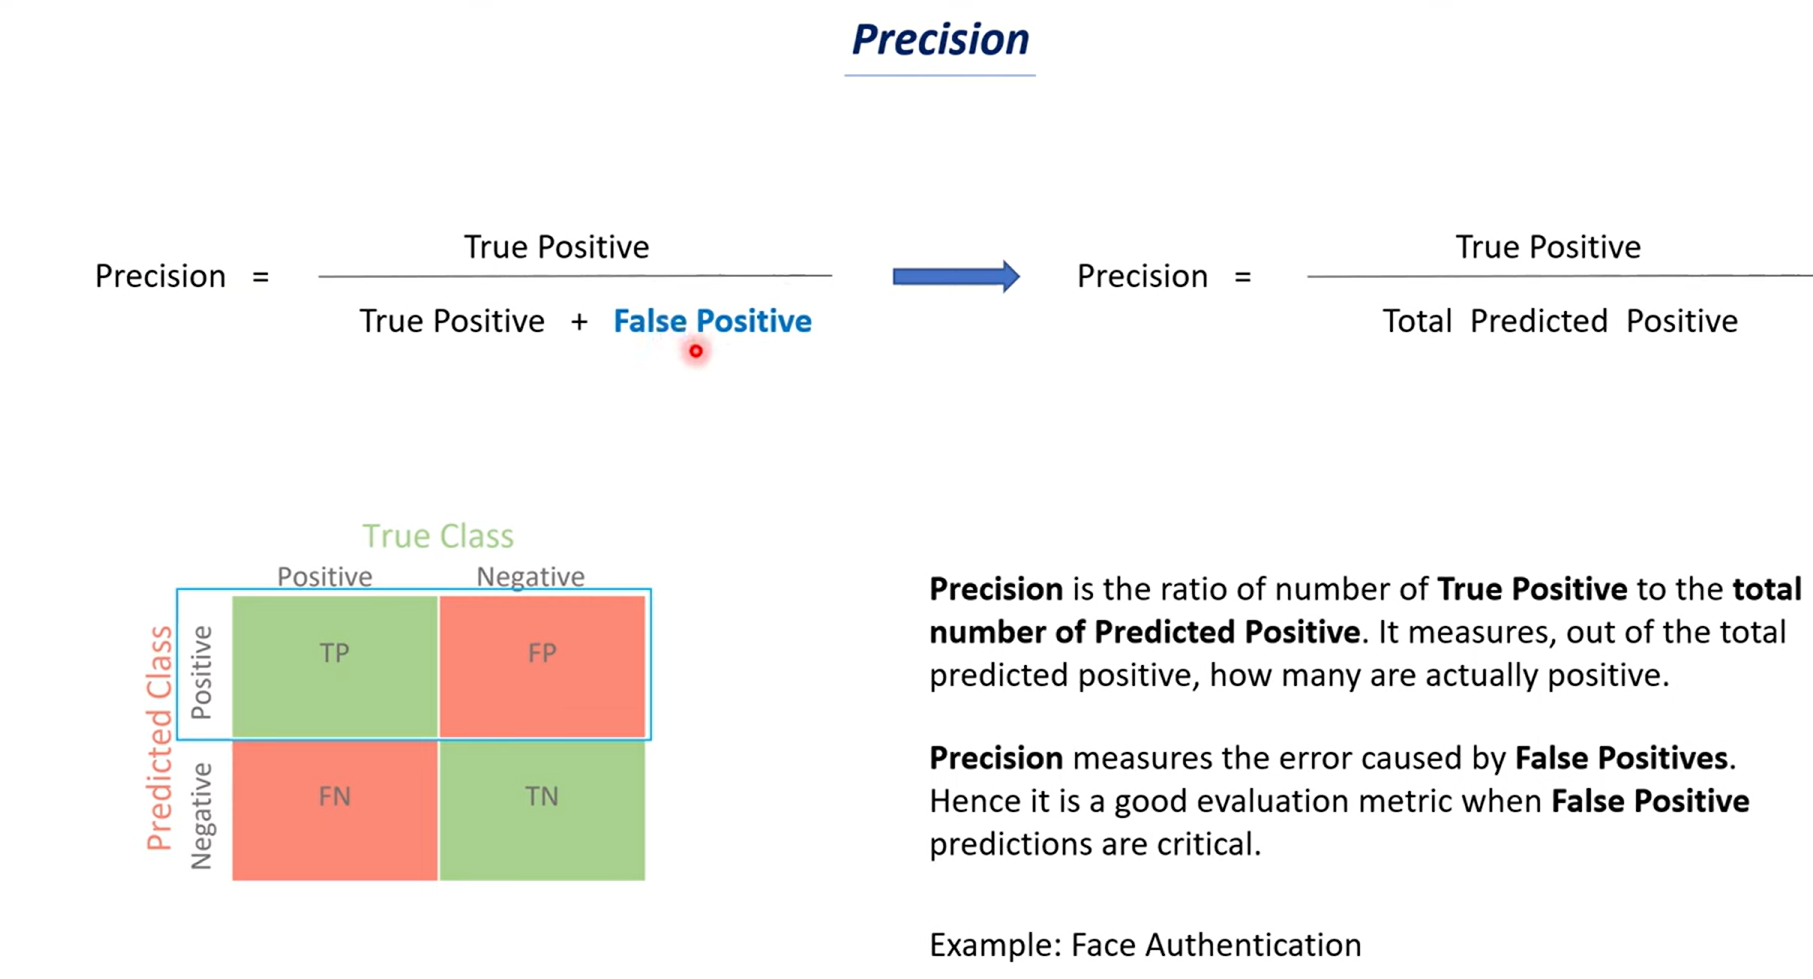

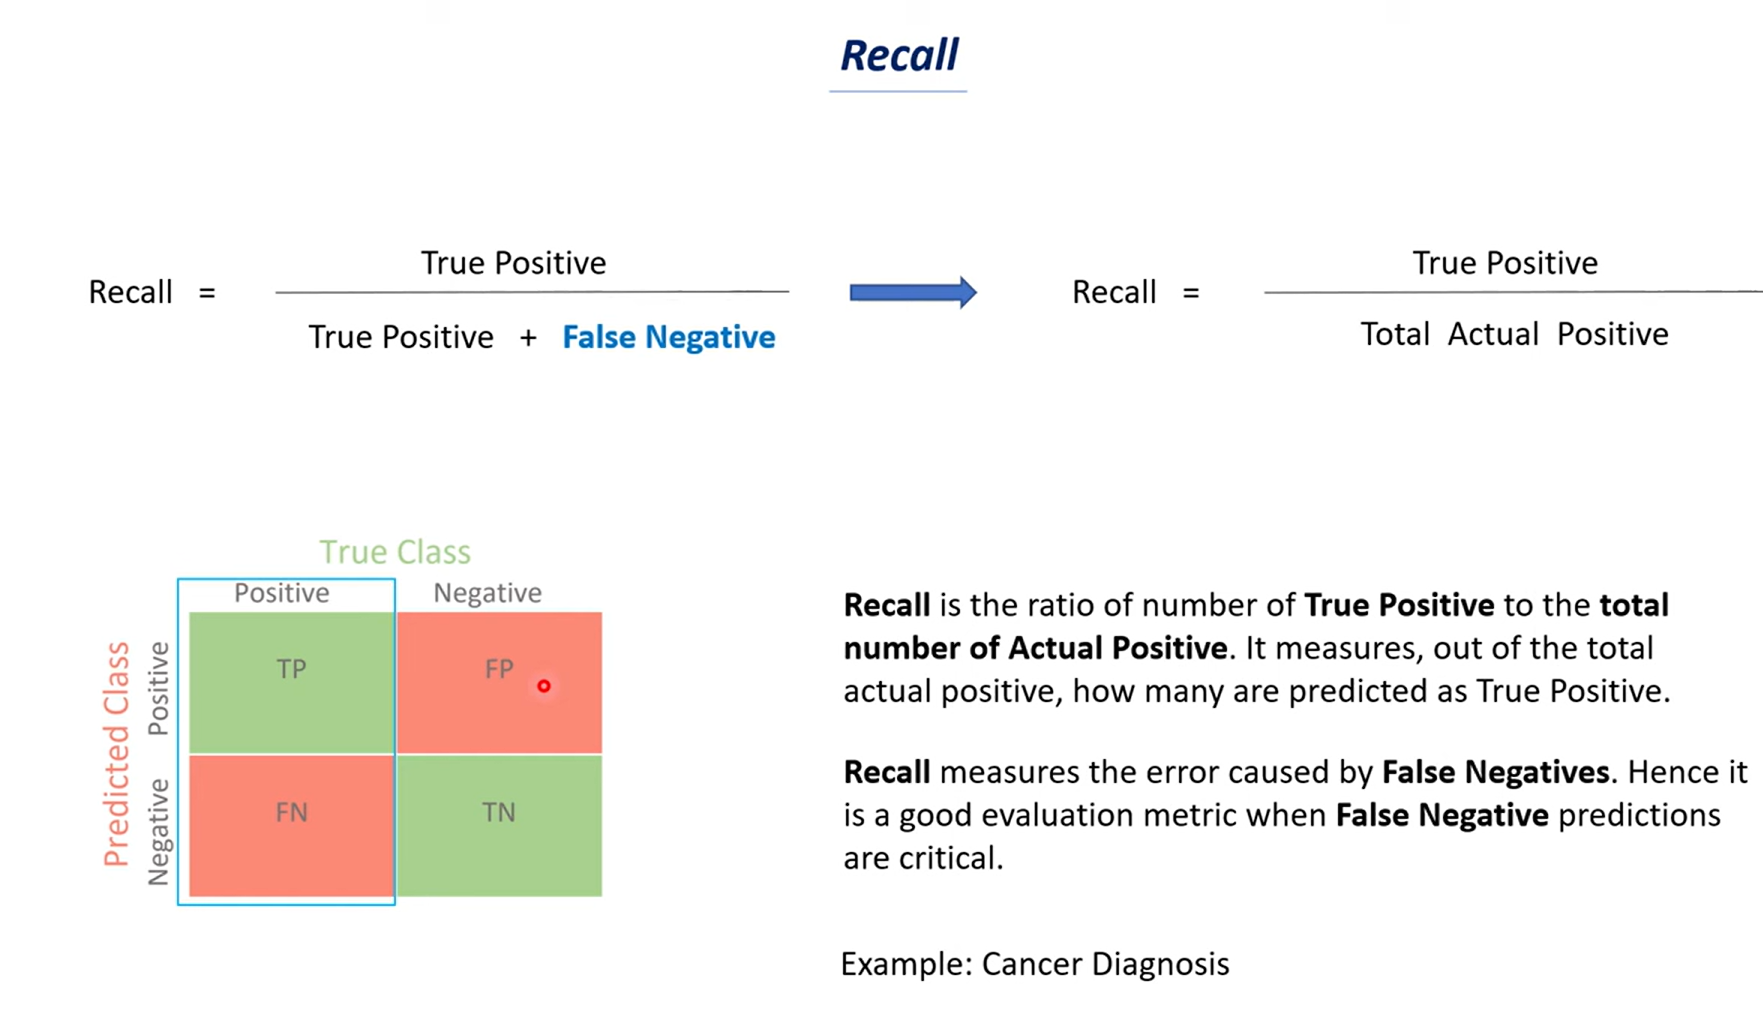

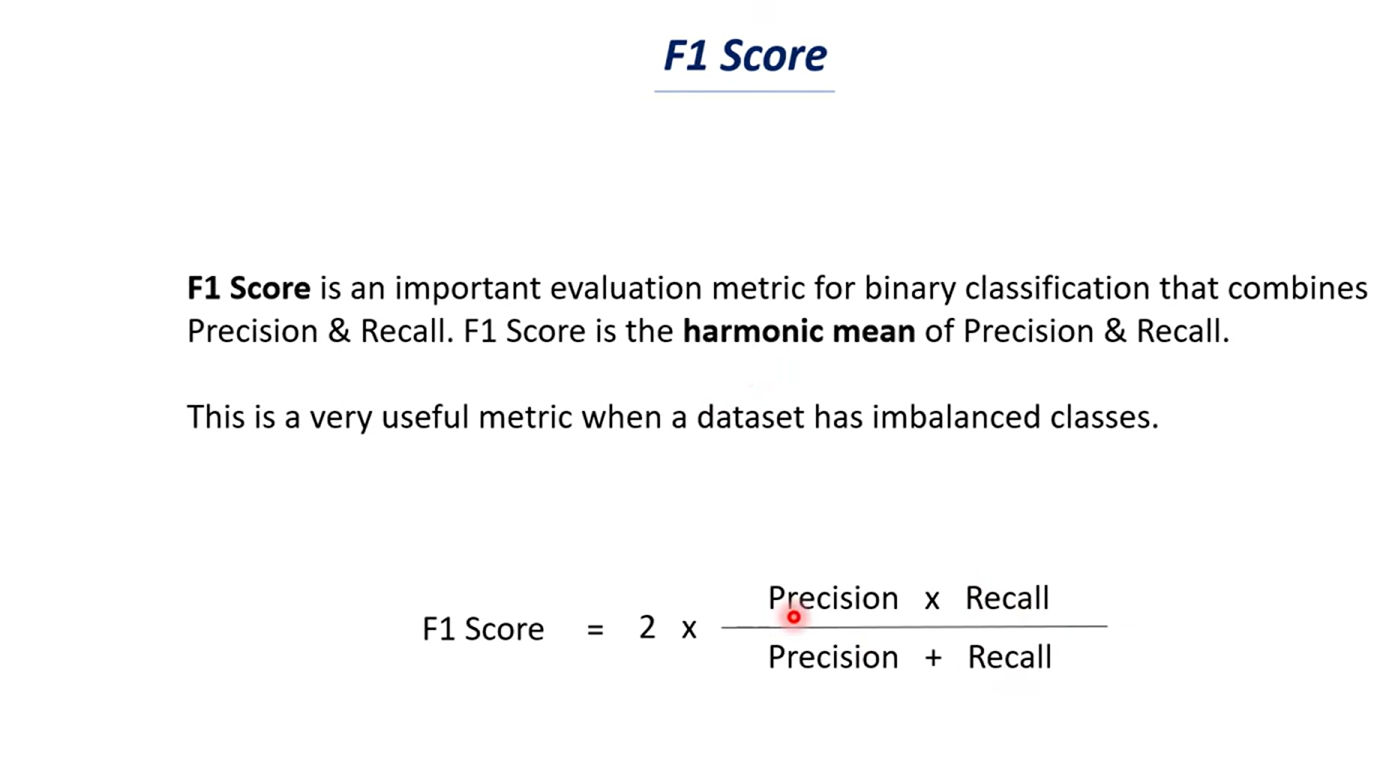

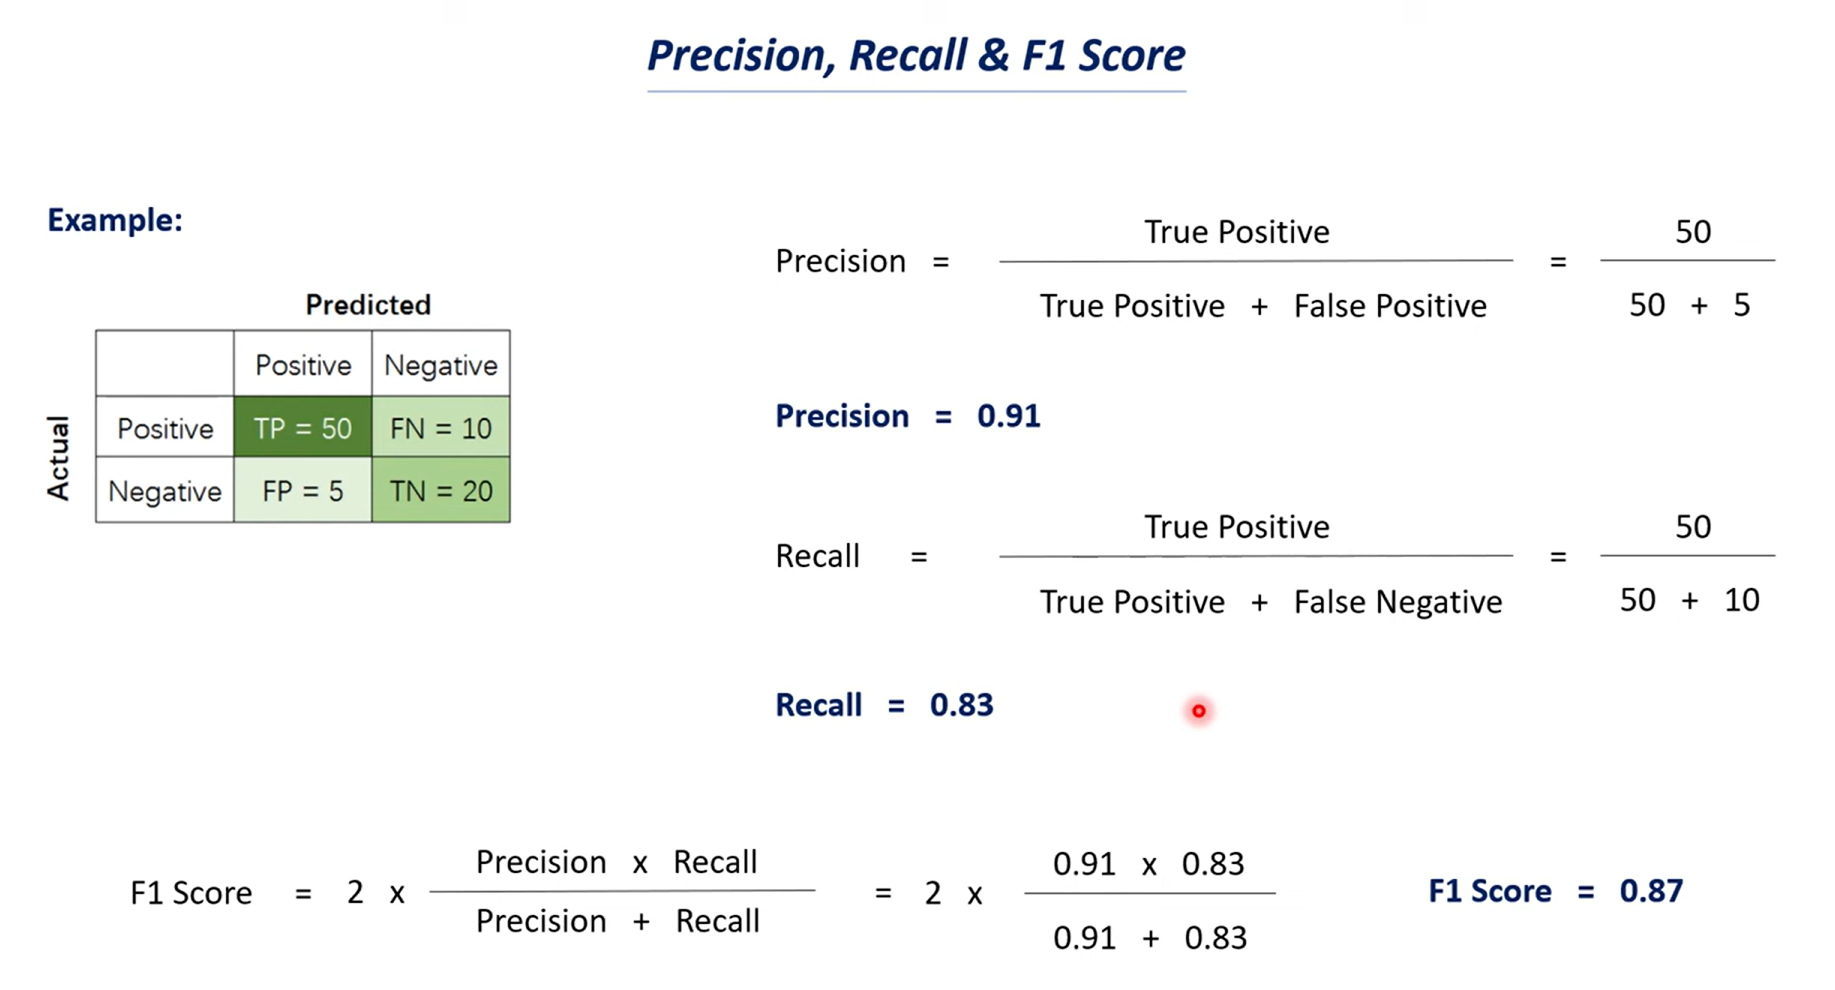

# **Code Implementation**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
heart_data = pd.read_csv("/content/drive/MyDrive/Databases /heart_data.csv")
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
heart_data['target'].value_counts()

,count
target,
1,165
0,138


In [ ]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)


print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


In [ ]:
model = LogisticRegression(max_iter=1000)


# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)


LogisticRegression(max_iter=1000)

In [ ]:
#Accuracy Score


from sklearn.metrics import accuracy_score


# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print(training_data_accuracy)

print('Accuracy on Training data : ', round(training_data_accuracy*100, 2), '%')

0.8553719008264463
Accuracy on Training data :  85.54 %


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print(test_data_accuracy)


print('Accuracy on Test data : ', round(test_data_accuracy*100, 2), '%')

0.8032786885245902
Accuracy on Test data :  80.33 %


**Precision**

Precision is the ratio of number of True Positive to the total number of Predicted Positive. It measures, out of the total predicted positive, how many are actually positive.

In [ ]:
from sklearn.metrics import precision_score


# precision for training data predictions
precision_train = precision_score(Y_train, X_train_prediction)
print('Training data Precision =', precision_train)


Training data Precision = 0.8299319727891157


In [ ]:
# precision for test data predictions
precision_test = precision_score(Y_test, X_test_prediction)
print('Test data Precision =', precision_test)

Test data Precision = 0.8181818181818182


**Recall**

Recall is the ratio of number of True Positive to the total number of Actual Positive. It measures, out of the total actual positive, how many are predicted as True Positive.

In [ ]:
from sklearn.metrics import recall_score


# recall for training data predictions
recall_train = recall_score(Y_train, X_train_prediction)
print('Training data Recall =', recall_train)

# recall for test data predictions
recall_test = recall_score(Y_test, X_test_prediction)
print('Test data Recall =', recall_test)

Training data Recall = 0.9242424242424242
Test data Recall = 0.8181818181818182


**F1 Score**

F1 Score is an important evaluation metric for binary classification that combines Precision & Recall. F1 Score is the harmonic mean of Precision & Recall.

In [ ]:
from sklearn.metrics import f1_score

# F1 score for training data predictions
f1_score_train = f1_score(Y_train, X_train_prediction)
print('Training data F1 Score =', f1_score_train)


# F1 Score for test data predictions
f1_score_test = recall_score(Y_test, X_test_prediction)
print('Test data F1 Score =', f1_score_test)

Training data F1 Score = 0.8745519713261649
Test data F1 Score = 0.8181818181818182
